<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов Бета-Банка


_____
**Описание исследования:**

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.



_____
**Цель исследования:**
    
Провести анализ данных при помощи которых предприятие разработает стратегию взаимодействия с клиентами.
    
_____
**Задачи исследования.**

1. Построить модель с предельно большим значением F1-меры, не меньше 0.59. 
2. Проверить F1-меру на тестовой выборке.
3. Дополнительно измерить AUC-ROC, сравнивая её значение с F1-мерой.
_____
**Исходные данные:**

Источник данных: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Признаки:
 - RowNumber — индекс строки в данных
 - CustomerId — уникальный идентификатор клиента
 - Surname — фамилия
 - CreditScore — кредитный рейтинг
 - Geography — страна проживания
 - Gender — пол
 - Age — возраст
 - Tenure — сколько лет человек является клиентом банка
 - Balance — баланс на счёте
 - NumOfProducts — количество продуктов банка, используемых клиентом
 - HasCrCard — наличие кредитной карты
 - IsActiveMember — активность клиента
 - EstimatedSalary — предполагаемая зарплата

Целевой признак:
 - Exited — факт ухода клиента
______

**Данное исследование разделим на несколько частей.**

***Часть 1. Подготовка данных:***
- проверка на наличие лишних данных для обучения;
- проверка типов данных;
- проверка на наличие пропусков;
- проверка на наличие выбросов;
- кодирование категориальных признаков;
- разбиение на выборки;
- масштабирование признаков;
- проверка на наличие мультиколлинеарности признаков.

***Часть 2. Исследование задачи:***

- исследование данных на баланс классов;
- обучение моделей без учета дисбаланса классов
* 
***Часть 3. Борьба с дисбалансом:***

- борьба с дисбалансом методом взвешивания классов;
- использование upsampling и downsampling для борьбы с дисбалансом.

***Часть 4. Тестирование модели***

***Часть 5. Общие выводы***

## Подготовка данных

In [1]:
# импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# познакомимся с файлом
data = pd.read_csv('Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**1.1 Проверка на наличие лишних данных для обучения.**

<a id='#1-bullet'></a>

**Наличие определенных столбцов в данных не несет никакой практической значимости для обучения моделей и может только привести к ошибкам.**

**Это столбцы - 'RowNumber', 'CustomerId', 'Surname'.**

**Удалим их.**

In [3]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**1.2 Проверка типов данных**

In [4]:
# изучим типы данных в таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


**Все корректно.**

**1.3 Проверка на наличие пропусков.**

In [5]:
# изучим количество пропусков
data.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

**Пропуски в столбце 'Tenure' составляют 9%.**

<Axes: >

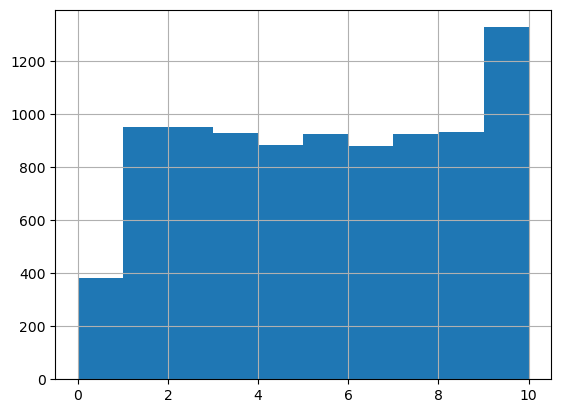

In [6]:
# помотрим, как распределены данные в столбце до заполнения пропусков
data['Tenure'].hist()

In [7]:
# заполним пропуски медианным значением по возрасту
for t in data['Age'].unique():
    data.loc[(data['Age'] == t) & (data['Tenure'].isna()), 'Tenure'] = \
    data.loc[(data['Age'] == t), 'Tenure'].median()

<Axes: >

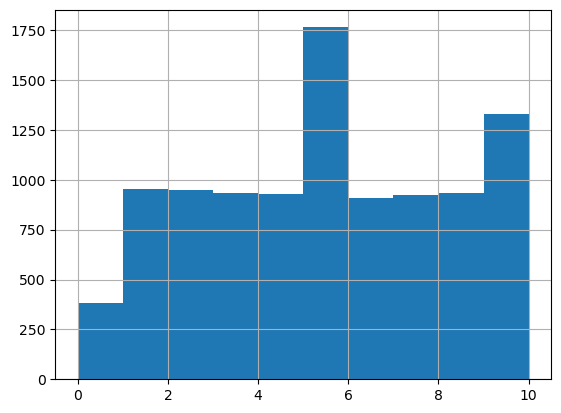

In [8]:
data['Tenure'].hist()

**Видим, что выбранный способ устранения пропусков искажает данные. Заполнение медианой привело к появлению заметного искусственного скачка в данных. В таком случае, в конкретной задаче, лучшим решением будет удалить пропуски.**

In [9]:
#удалим пропуски
data = data.dropna(subset=['Tenure']).reset_index(drop=True)

In [10]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**1.4 Проверка на наличие выбросов.**

**Исследуем данные, чтобы посмотреть как распределены значения.**

Text(0.5, 1.0, 'CreditScore. Boxplot')

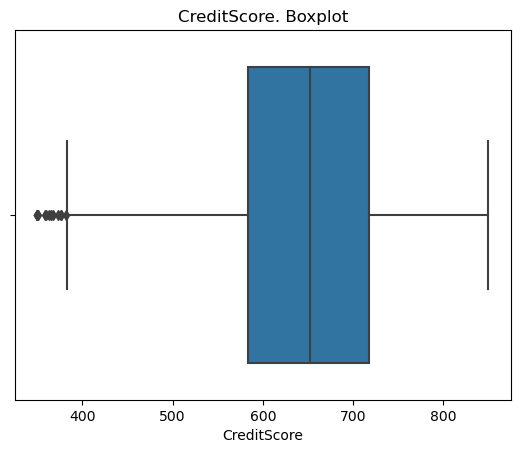

In [11]:
# построим boxplot для некоторых признаков, чтобы проверить наличие выбросов в данных
sns.boxplot(x=data['CreditScore'])
plt.title('CreditScore. Boxplot')

Text(0.5, 1.0, 'Age. Boxplot')

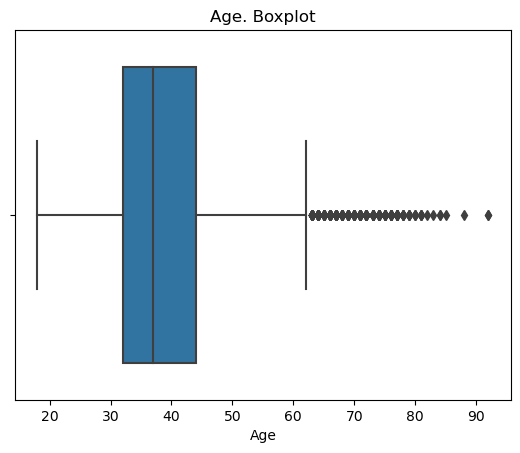

In [12]:
sns.boxplot(x=data['Age'])
plt.title('Age. Boxplot')

Text(0.5, 1.0, 'Balance. Boxplot')

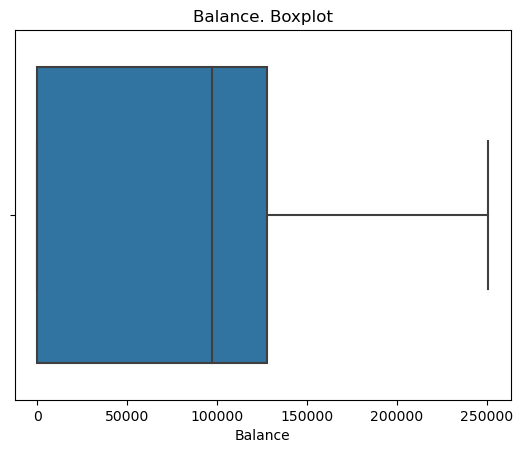

In [13]:
sns.boxplot(x=data['Balance'])
plt.title('Balance. Boxplot')

**В столбцах 'CreditScore' и 'Age' имеются выбросы. Нужно учесть это при масштабировании.**

**1.5 Кодирование категориальных признаков**

**Можем заметить, что в данных имеются категориальные признаки в столбцах 'Geography' и 'Gender'.**

**Так как мы будем тестировать и проверять разные модели, лучшим решением будет использовать метод прямого кодирования, который работает также с логистической регрессией, в отличие от порядкового кодирования.**

In [14]:
# проводим кодирование категориальных признаков
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8.0,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1.0,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2.0,125510.82,1,1,1,79084.10,0,False,True,False


**1.6 Разбиение на выборки**

**Перед тем как заполнять пропуски и масштабировать некоторые признаки, проведем разбиение данных на три выборки: обучающую, валидационную и тестовую.**

In [15]:
# для начала извлечем признаки
features = data_ohe.drop(['Exited'], axis=1)# извлекаем признаки 
target = data_ohe['Exited'] # извлекаем целевой признак

In [16]:
# разобьем данные на обучающую, валидационную и тестовую выборки
features_train, features_1, target_train, target_1 = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_1, target_1, test_size=0.5, random_state=12345)

In [17]:
# проверим размеры выборок
print(features.shape)
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(10000, 11)
(6000, 11)
(2000, 11)
(2000, 11)


**1.7 Проверка на наличие мультиколлинеарности признаков.**

<Axes: >

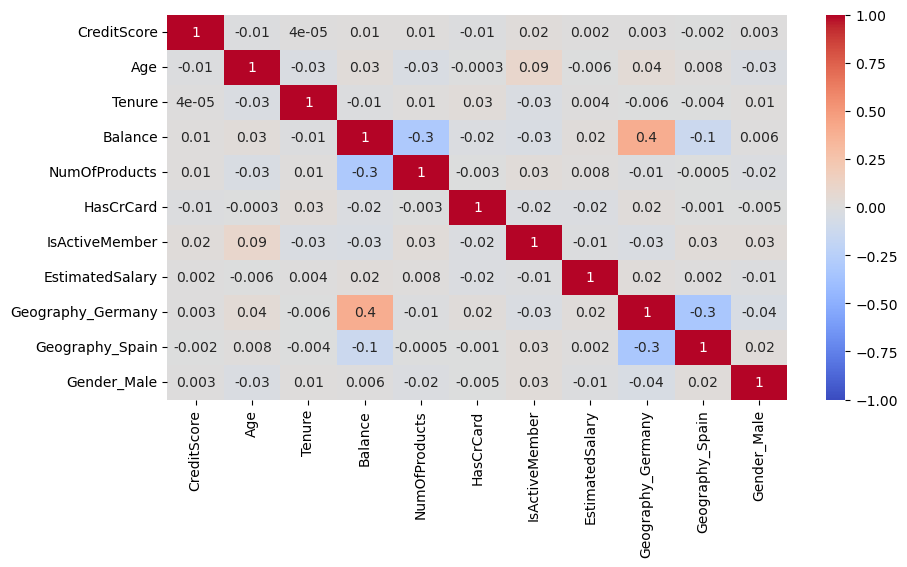

In [18]:
# построим тепловую карту корреляции признаков
plt.figure(figsize=(10,5))
sns.heatmap(features_train.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', fmt='.1g')


**Сильно значимой корреляции признаков не выявлено.**

**1.8 Масштабирование признаков**

In [19]:
# проведем масштабирование методом StandartScaler
scaler = StandardScaler().fit(features_train)
features_train_scaler = scaler.transform(features_train)
features_valid_scaler = scaler.transform(features_valid)
features_test_scaler = scaler.transform(features_test)

## Исследование задачи

**2.1 Исследование данных на баланс классов**

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


<Axes: xlabel='Exited'>

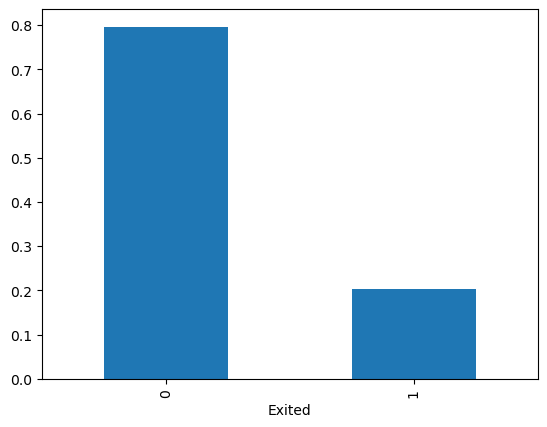

In [20]:
#выполним подсчет классов в целевом признаке
class_frequency = target.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar') 

Exited
0    0.800667
1    0.199333
Name: proportion, dtype: float64


<Axes: xlabel='Exited'>

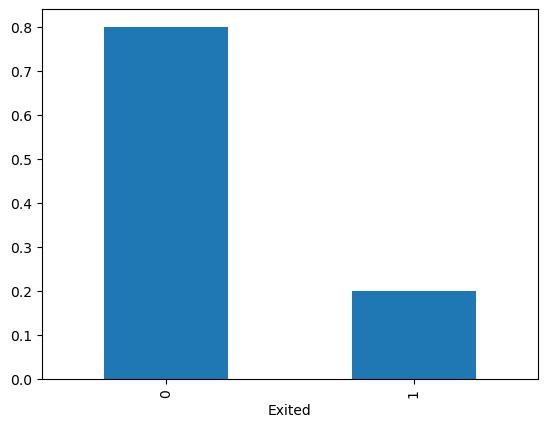

In [21]:
# проверим также баланс у классов тренировочной выборки
class_frequency_train = target_train.value_counts(normalize=True)
print(class_frequency_train)
class_frequency_train.plot(kind='bar') 

**Наблюдается сильный дисбаланс классов: 4:1**

**2.2 Обучение модели без учета дисбаланса классов**

**2.2.1 Обучим модель логистической регрессии без учета дисбаланса классов и посмотрим на значение f1-меры**

In [22]:
#обучаем модель логистической регрессии на несбалансированных данных
model = LogisticRegression(random_state=12345, solver='liblinear') 
model.fit(features_train_scaler, target_train) # обучаем модель на тренировочной выборке
predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики на валидационной выборке
print("F1-мера")
print("Валидационная выборка:", result)

F1-мера
Валидационная выборка: 0.33389544688026984


**2.2.2 Обучим модель дерево решений без учета дисбаланса классов и посмотрим на значение f1-меры**

In [23]:
#обучаем модель 'дерево решений' на несбалансированных данных
best_result = 0
best_depth = 0
for depth in range(1, 6):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train_scaler, target_train) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
    result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики на валидационной выборке
    if result > best_result:
        best_result = result
        best_depth = depth
print("F1-мера")
print("Валидационная выборка:", best_result, "Лучшая глубина:", best_depth)

F1-мера
Валидационная выборка: 0.5528700906344411 Лучшая глубина: 4


**2.2.3 Обучим модель "случайный лес" без учета дисбаланса классов и посмотрим на значение f1-меры**

In [24]:
#обучаем модель "случайный лес" на несбалансированных данных
best_result = 0
best_est = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train_scaler, target_train) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
    result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики на валидационной выборке
    if result > best_result:
        best_result = result
        best_est = est
print("F1-мера")
print("Валидационная выборка:", best_result, "Лучшее количество деревьев:", best_est)

F1-мера
Валидационная выборка: 0.587431693989071 Лучшее количество деревьев: 7


**Лучше всего показывает себя модель "случайный лес", что даже на несбалансированных данных достигает F1-меры, равной почти 0,59.**

**2.2.4 Обучим модель "метод ближайших соседей"**

In [25]:
#обучаем модель "метод ближайших соседей" 
best_result = 0
best_n_neighbors = 0
for neighbors in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(features_train_scaler, target_train) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
    result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики на валидационной выборке
    if result > best_result:
        best_result = result
        best_n_neighbors = neighbors
print("F1-мера")
print("Валидационная выборка:", best_result, "Лучшее число ближайших соседей:", best_n_neighbors)

F1-мера
Валидационная выборка: 0.4930817610062893 Лучшее число ближайших соседей: 1


## Борьба с дисбалансом

**3.1 Борьба с дисбалансом методом взвешивания классов**

**3.1.1 Обучим модель "логистическая регрессия" с учетом дисбаланса и посмотрим на значение f1-меры**

In [26]:
#обучаем модель логистической регрессии с учетом дисбаланса данных
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
model.fit(features_train_scaler, target_train) # обучаем модель на тренировочной выборке
predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики на валидационной выборке
print("F1-мера")
print("Валидационная выборка:", result)

F1-мера
Валидационная выборка: 0.4888507718696398


**3.1.2 Обучим модель "дерево решений" с учетом дисбаланса и посмотрим на значение f1-меры**

In [27]:
#обучаем модель "дерева решений" с учетом дисбаланса данных
best_result = 0
best_depth = 0
for depth in range(1, 7):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    model.fit(features_train_scaler, target_train) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
    result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики на валидационной выборке
    if result > best_result:
        best_result = result
        best_depth = depth
print("F1-мера")
print("Валидационная выборка:", best_result, "Лучшая глубина:", best_depth)

F1-мера
Валидационная выборка: 0.5963791267305644 Лучшая глубина: 5


**3.1.3 Обучим модель "случайный лес" с учетом дисбаланса и посмотрим на значение f1-меры**

In [28]:
#обучаем модель "случайный лес" с учетом дисбаланса данных
best_result = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced')
    model.fit(features_train_scaler, target_train) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
    result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики на валидационной выборке
    if result > best_result:
        best_result = result
        best_est = est
print("F1-мера")
print("Валидационная выборка:", best_result, "Лучшее количество деревьев:", best_est)

F1-мера
Валидационная выборка: 0.5507246376811594 Лучшее количество деревьев: 9


In [29]:
# добавим в модель "случайный лес" еще параметр max_depth и в разы увеличим количество деревьев
best_result = 0
best_est = 0
best_depth = 0
for est in range(1, 70):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced', max_depth=depth)
        model.fit(features_train_scaler, target_train) # обучаем модель на тренировочной выборке
        predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_result = result
            best_depth = depth
            best_est = est
    if result > best_result:
        best_result = result
        best_est = est
print("F1-мера")
print("Валидационная выборка:", result, "Лучшая глубина:", best_depth, "Лучшее количество деревьев:", best_est)

F1-мера
Валидационная выборка: 0.6281179138321994 Лучшая глубина: 9 Лучшее количество деревьев: 45


**Можно заметить заметный прирост качества модели логистической регрессии при устранении дисбаланса классов методом взвешивания.**
**Качество моделей "дерево решений" и "cлучайный лес" также увеличилось.** 
**Модель "cлучайный лес" при учете дисбаланса методом взвешивания дает нам желательную величину метрики F1-меры, большую 0,59.**

**3.2 Использование upsampling и downsampling для борьбы с дисбалансом**

**3.2.1 Использование upsampling для борьбы с дисбалансом**

In [30]:
# увелим число строк с целевым признаком, равным 1, в тренировочной выборке в 4 раза
features_train_zeros = features_train[target_train == 0]
features_train_ones = features_train[target_train == 1]
target_train_zeros = target_train[target_train == 0]
target_train_ones = target_train[target_train == 1]
    
features_upsampled_train = pd.concat([features_train_zeros] + [features_train_ones] * 4)
target_upsampled_train = pd.concat([target_train_zeros] + [target_train_ones] * 4)
    
features_upsampled_train, target_upsampled_train = shuffle(features_upsampled_train, target_upsampled_train, random_state=12345)

Exited
0    0.501043
1    0.498957
Name: proportion, dtype: float64


<Axes: xlabel='Exited'>

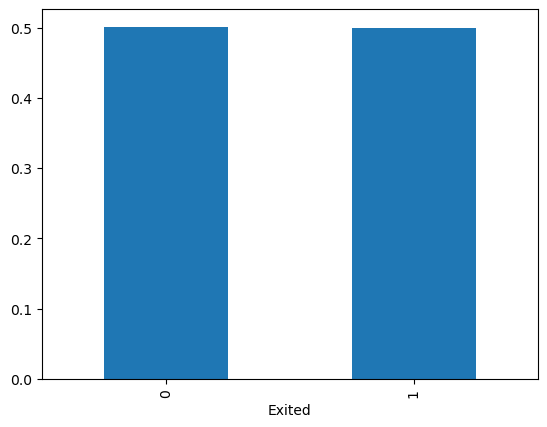

In [31]:
# посмотрим на соотношение классов теперь
class_frequency_train_balanced = target_upsampled_train.value_counts(normalize=True)
print(class_frequency_train_balanced)
class_frequency_train_balanced.plot(kind='bar') 

**Теперь соотношение классов 1:1.**

**Повторим масштабирование признаков для отбалансированной тренировочной выборки.**

In [32]:
# проведем масштабирование методом StandartScaler
scaler = StandardScaler()
features_train_upsampled_scaler = scaler.fit_transform(features_upsampled_train)

**Обучение моделей на сбалансированной выборке после upsampling**

**Обучим модель "логистическая регрессия" с учетом дисбаланса и посмотрим на значение f1-меры**

In [33]:
#обучаем модель логистической регрессии на сбалансированных методом upsampling данных 
model = LogisticRegression(random_state=12345, solver='liblinear') 
model.fit(features_train_upsampled_scaler, target_upsampled_train) # обучаем модель на тренировочной выборке
predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики на валидационной выборке
print("F1-мера")
print("Валидационная выборка:", result)

F1-мера
Валидационная выборка: 0.47619047619047616


**Обучим модель "дерево решений" с учетом дисбаланса и посмотрим на значение f1-меры**

In [34]:
#обучаем модель "дерева решений" на сбалансированных методом upsampling данных
best_result = 0
best_depth = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train_upsampled_scaler, target_upsampled_train) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
    result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики на валидационной выборке
    if result > best_result:
        best_result = result
        best_depth = depth
print("F1-мера")
print("Валидационная выборка:", best_result, "Лучшая глубина:", best_depth)

F1-мера
Валидационная выборка: 0.5785920925747348 Лучшая глубина: 5


**Обучим модель "случайный лес" с учетом дисбаланса и посмотрим на значение f1-меры**

In [35]:
#обучаем модель "случайный лес" на сбалансированных методом upsampling данных
best_result = 0
best_est = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train_upsampled_scaler, target_upsampled_train) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
    result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики на валидационной выборке
    if result > best_result:
        best_result = result
        best_est = est
print("F1-мера")
print("Валидационная выборка:", best_result, "Лучшее количество деревьев:", best_est)

F1-мера
Валидационная выборка: 0.5816831683168316 Лучшее количество деревьев: 10


In [36]:
# добавим в модель "случайный лес" еще параметр max_depth и в разы увеличим количество деревьев
best_result = 0
best_est = 0
best_depth = 0
for est in range(1, 70):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train_upsampled_scaler, target_upsampled_train) # обучаем модель на тренировочной выборке
        predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_result = result
            best_depth = depth
            best_est = est
    if result > best_result:
        best_result = result
        best_est = est
print("F1-мера")
print("Валидационная выборка:", result, "Лучшая глубина:", best_depth, "Лучшее количество деревьев:", best_est)

F1-мера
Валидационная выборка: 0.5967588179218303 Лучшая глубина: 8 Лучшее количество деревьев: 15


**Метрика F1-меры достигает хорошего результата при использовании upsampling, но хуже, чем при использовании метода взвешивания классов.**

**3.2.2 Использование downsampling для борьбы с дисбалансом**

In [37]:
# уменьшим число строк с целевым признаком, равным 0, в тренировочной выборке в 4 раза
features_downsampling_train = pd.concat([features_train_zeros.sample(frac=0.25, random_state=12345)] + [features_train_ones])
target_downsampling_train = pd.concat([target_train_zeros.sample(frac=0.25, random_state=12345)] + [target_train_ones])

features_downsampling_train, target_downsampling_train = shuffle(features_downsampling_train, target_downsampling_train, random_state=12345)

Exited
0    0.501043
1    0.498957
Name: proportion, dtype: float64


<Axes: xlabel='Exited'>

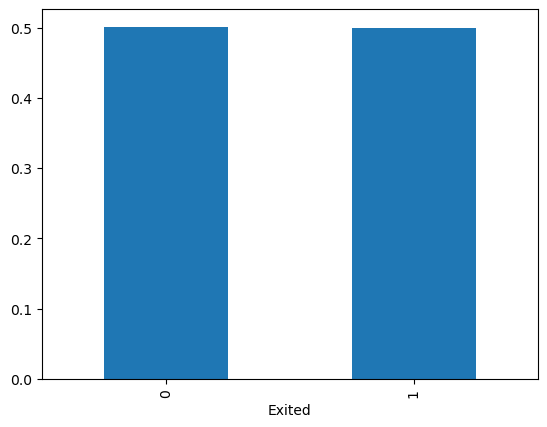

In [38]:
# посмотрим на соотношение классов теперь
class_frequency_train_balanced = target_downsampling_train.value_counts(normalize=True)
print(class_frequency_train_balanced)
class_frequency_train_balanced.plot(kind='bar')

In [39]:
# проведем масштабирование методом StandartScaler
scaler = StandardScaler()
features_train_downsampling_scaler = scaler.fit_transform(features_downsampling_train)

**Обучение моделей на сбалансированной выборке после downsampling**

**Обучим модель "логистическая регрессия" с учетом дисбаланса и посмотрим на значение f1-меры**

In [40]:
#обучаем модель логистической регрессии на сбалансированных методом downsampling данных 
model = LogisticRegression(random_state=12345, solver='liblinear') 
model.fit(features_train_downsampling_scaler, target_downsampling_train) # обучаем модель на тренировочной выборке
predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики на валидационной выборке
print("F1-мера")
print("Валидационная выборка:", result)

F1-мера
Валидационная выборка: 0.4855491329479768


**Обучим модель "дерево решений" с учетом дисбаланса и посмотрим на значение f1-меры**

In [41]:
#обучаем модель "дерева решений" на сбалансированных методом downsampling данных
best_result = 0
best_depth = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train_downsampling_scaler, target_downsampling_train) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
    result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики на валидационной выборке
    if result > best_result:
        best_result = result
        best_depth = depth
print("F1-мера")
print("Валидационная выборка:", best_result, "Лучшая глубина:", best_depth)

F1-мера
Валидационная выборка: 0.5796831314072695 Лучшая глубина: 5


**Обучим модель "случайный лес" с учетом дисбаланса и посмотрим на значение f1-меры**

In [42]:
#обучаем модель "случайный лес" на сбалансированных методом downsampling данных
best_result = 0
best_est = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train_downsampling_scaler, target_downsampling_train) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
    result = f1_score(target_valid, predictions_valid) # посчитаем значение метрики на валидационной выборке
    if result > best_result:
        best_result = result
        best_est = est
print("F1-мера")
print("Валидационная выборка:", best_result, "Лучшее количество деревьев:", best_est)

F1-мера
Валидационная выборка: 0.5623869801084992 Лучшее количество деревьев: 8


In [43]:
# добавим в модель "случайный лес" еще параметр max_depth и в разы увеличим количество деревьев
best_result = 0
best_est = 0
best_depth = 0
for est in range(1, 70):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train_downsampling_scaler, target_downsampling_train) # обучаем модель на тренировочной выборке
        predictions_valid = model.predict(features_valid_scaler) # получаем предсказания модели на валидационной выборке
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_result = result
            best_depth = depth
            best_est = est
    if result > best_result:
        best_result = result
        best_est = est
print("F1-мера")
print("Валидационная выборка:", result, "Лучшая глубина:", best_depth, "Лучшее количество деревьев:", best_est)

F1-мера
Валидационная выборка: 0.5685106382978723 Лучшая глубина: 7 Лучшее количество деревьев: 15


**Метрика F1-меры достигает хорошего результата и при использовании downsamplin, но результат мало отличется от метрик, полученных при upsampling**

## Тестирование модели

**4.1 Выбор модели для тестирования**

**Лучше всего себя показала модель "случайный лес" с параметрами random_state=12345, n_estimators=45, class_weight='balanced' и  max_depth=9.**
**Будем использовать ее для финального тестирования.**

**4.2 Тестирование модели и исследование метрики auc_roc**

In [47]:
model = RandomForestClassifier(max_depth=9, random_state=12345, class_weight='balanced', n_estimators=45)
model.fit(features_train_scaler, target_train) # обучаем модель на тренировочной выборке
predictions_test = model.predict(features_test_scaler) # получаем предсказания модели на валидационной выборке
result = f1_score(target_test, predictions_test)
print("F1-мера")
print("Тестовая выборка:", result)

F1-мера
Тестовая выборка: 0.6155555555555555


In [48]:
# найдем значение площади под кривой
probabilities_test = model.predict_proba(features_test_scaler)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.8507460225373311


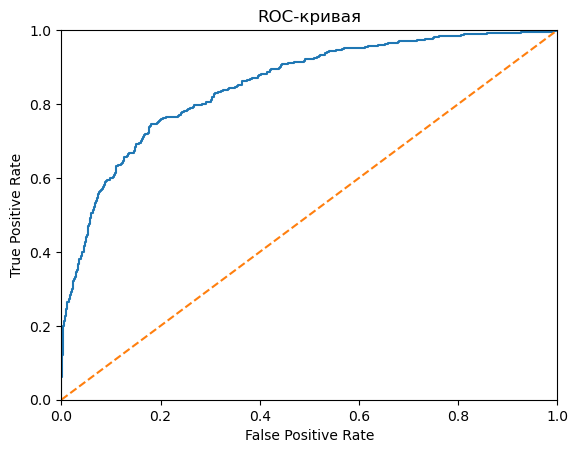

In [49]:
# построим ROC-кривую
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая") 
plt.show()

**Значение метрики F1-меры лучшей модели равно 0,61.**

## Общие выводы

Мы познакомились с данными  клиентов «Бета-Банка». Требовалось построить модель для задачи классификации, которая спрогнозирует уйдёт клиент из банка в ближайшее время или нет. 

Выполнено следующее:

1.Подготовка данных: 
- проверка на наличие лишних данных для обучения;
- проверка типов данных;
- проверка на наличие пропусков;
- проверка на наличие выбросов;
- кодирование категориальных признаков;
- разбиение на выборки;
- исследована возможность заполнения пропусков в столбце 'Tenure' и принято решение об их удалении;
- масштабирование признаков;
- проверка на наличие мультиколлинеарности признаков.

2.Исследование задачи:

- исследование данных на баланс классов. Обнаружен дисбаланс 4 к 1;
- обучены модели "логистическая регрессия", "дерево решений", "случайный лес", "kNN" без учета дисбаланса классов, исследованы их метрики f1-меры.

3.Борьба с дисбалансом:

- исследованы выше указанные модели и их метрики с использованием метода взвешивания классов;
- применены методы upsampling и downsampling и исследованы метрики моделей.

4.Тестирование модели:

- лучшей выбрана модель "случайный лес" с гиперпараметрами random_state=12345, n_estimators=45, class_weight='balanced' и  max_depth=9;
- получено значение F1-меры, построена и исследована ROC-кривая. Значение F1-меры получилось равное 0,61.

